# WeatherPy
----

#### Trend

1. Latitude forms an inverse relationship with temperature, where regions at lower latitudes have higher temperatures compared to areas at higher latitudes. 
2. The region at around 25 and -25 have wider range humidity.
3. Windspeeds in different cities don't have significant difference to Latitudes, but it is important to note that highest wind speed outliers all occur at latitudes furthest from the equator.

In [56]:
import json
import requests as req
import random
import seaborn as sns
import pandas as pd
import math as math
import time
import numpy as np
import matplotlib.pyplot as plt
from citipy import citipy
api_key = "ca948e37c7fc34fc07a1ece6ffdb31a0"

## Generate Cities List

In [57]:
location_data = pd.DataFrame()
location_data['lat_values'] = [np.random.uniform(-90,90) for x in range(1500)]
location_data['lng_values'] = [np.random.uniform(-180, 180) for x in range(1500)]

location_data.head()

,lat_values,lng_values
0,40.254690,90.899097
1,22.464996,108.331681
2,15.027144,-174.270271
3,68.004138,8.188164
4,-46.524722,-141.615643


In [58]:
location_data['city'] = ""
location_data['country'] = ""

count = 0
for index, row in location_data.iterrows():
    near_city = citipy.nearest_city(row['lat_values'], row['lng_values']).city_name
    near_country = citipy.nearest_city(row['lat_values'], row['lng_values']).country_code
    location_data.set_value(index,"city",near_city)
    location_data.set_value(index,"country",near_country)
location_data.head()

/Users/jingduan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
/Users/jingduan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':


,lat_values,lng_values,city,country
0,40.254690,90.899097,hami,cn
1,22.464996,108.331681,pumiao,cn
2,15.027144,-174.270271,kapaa,us
3,68.004138,8.188164,sistranda,no
4,-46.524722,-141.615643,rikitea,pf


In [59]:
len(location_data)

1500

In [60]:
location_data=location_data.drop_duplicates(['city','country'],keep = "first")

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [61]:
location_data['Temp'] = ""
location_data['Humidity'] = ""
location_data['Cloudiness'] = ""
location_data['Wind Speed'] = ""
location_data["Lat"] =""
location_data["Longitude"] =""

In [62]:

sample_size = 500

target_url = 'http://api.openweathermap.org/data/2.5/weather?q='
units = 'imperial'
location_data.head()

,lat_values,lng_values,city,country,Temp,Humidity,Cloudiness,Wind Speed,Lat,Longitude
0,40.254690,90.899097,hami,cn,,,,,,
1,22.464996,108.331681,pumiao,cn,,,,,,
2,15.027144,-174.270271,kapaa,us,,,,,,
3,68.004138,8.188164,sistranda,no,,,,,,
4,-46.524722,-141.615643,rikitea,pf,,,,,,


In [63]:
record = 0
for index, row in location_data.iterrows():
    city_name = row['city']
    country_code = row['country']
    url = target_url + city_name + ',' + country_code + '&units=' + units + '&APPID=' + api_key
    print (url)
    try: 
        weather_response = req.get(url)
        weather_json = weather_response.json()
        latitude = weather_json["coord"]["lat"]
        longitude = weather_json["coord"]["lon"]
        temp = weather_json["main"]["temp"]
        humidity = weather_json["main"]["humidity"]
        cloud = weather_json["clouds"]["all"]
        wind = weather_json["wind"]["speed"]
        location_data.set_value(index,"Temp", temp)
        location_data.set_value(index,"Humidity",humidity)
        location_data.set_value(index,"Wind Speed", wind)
        location_data.set_value(index,"Cloudiness",cloud)
        location_data.set_value(index,"Lat", latitude)
        location_data.set_value(index,"Longitude",longitude)
        print("Retrieved data for %s, %s" % (city_name, country_code))
    except:
        print("No data for %s, %s" % (city_name,country_code))
    record += 1
    if record % 59 == 0:
        time.sleep(60)

http://api.openweathermap.org/data/2.5/weather?q=hami,cn&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for hami, cn
http://api.openweathermap.org/data/2.5/weather?q=pumiao,cn&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0


/Users/jingduan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  app.launch_new_instance()
/Users/jingduan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/jingduan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/jingduan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/jingduan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: FutureWarning: set_value is deprecated and will be removed in a future r

Retrieved data for pumiao, cn
http://api.openweathermap.org/data/2.5/weather?q=kapaa,us&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for kapaa, us
http://api.openweathermap.org/data/2.5/weather?q=sistranda,no&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for sistranda, no
http://api.openweathermap.org/data/2.5/weather?q=rikitea,pf&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for rikitea, pf
http://api.openweathermap.org/data/2.5/weather?q=victor harbor,au&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for victor harbor, au
http://api.openweathermap.org/data/2.5/weather?q=hobart,au&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for hobart, au
http://api.openweathermap.org/data/2.5/weather?q=bo rai,th&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for bo rai, th
http://api.openweathermap.org/data/2.5/weather?q=jamestown,sh&units=imperial&APPID=ca948e37c

Retrieved data for vaini, to
http://api.openweathermap.org/data/2.5/weather?q=nikolskoye,ru&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for nikolskoye, ru
http://api.openweathermap.org/data/2.5/weather?q=sagua la grande,cu&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for sagua la grande, cu
http://api.openweathermap.org/data/2.5/weather?q=baixo guandu,br&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for baixo guandu, br
http://api.openweathermap.org/data/2.5/weather?q=freeport,bs&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for freeport, bs
http://api.openweathermap.org/data/2.5/weather?q=dicabisagan,ph&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for dicabisagan, ph
http://api.openweathermap.org/data/2.5/weather?q=dingle,ie&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for dingle, ie
http://api.openweathermap.org/data/2.5/weather?q=cidreira,br&

Retrieved data for verkhnyaya inta, ru
http://api.openweathermap.org/data/2.5/weather?q=atar,mr&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for atar, mr
http://api.openweathermap.org/data/2.5/weather?q=kizukuri,jp&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for kizukuri, jp
http://api.openweathermap.org/data/2.5/weather?q=bandarbeyla,so&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for bandarbeyla, so
http://api.openweathermap.org/data/2.5/weather?q=nouadhibou,mr&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for nouadhibou, mr
http://api.openweathermap.org/data/2.5/weather?q=guozhen,cn&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for guozhen, cn
http://api.openweathermap.org/data/2.5/weather?q=ingham,au&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for ingham, au
http://api.openweathermap.org/data/2.5/weather?q=ilabaya,pe&units=imperial&APPID=ca

Retrieved data for hobyo, so
http://api.openweathermap.org/data/2.5/weather?q=egvekinot,ru&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for egvekinot, ru
http://api.openweathermap.org/data/2.5/weather?q=hovd,mn&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for hovd, mn
http://api.openweathermap.org/data/2.5/weather?q=kathu,th&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for kathu, th
http://api.openweathermap.org/data/2.5/weather?q=progreso,mx&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for progreso, mx
http://api.openweathermap.org/data/2.5/weather?q=bambous virieux,mu&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for bambous virieux, mu
http://api.openweathermap.org/data/2.5/weather?q=port blair,in&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for port blair, in
http://api.openweathermap.org/data/2.5/weather?q=norman wells,ca&units=imperial&APP

Retrieved data for moranbah, au
http://api.openweathermap.org/data/2.5/weather?q=kiama,au&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for kiama, au
http://api.openweathermap.org/data/2.5/weather?q=rio grande,br&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for rio grande, br
http://api.openweathermap.org/data/2.5/weather?q=santa marta,co&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for santa marta, co
http://api.openweathermap.org/data/2.5/weather?q=cimislia,md&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for cimislia, md
http://api.openweathermap.org/data/2.5/weather?q=illela,ne&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
No data for illela, ne
http://api.openweathermap.org/data/2.5/weather?q=parksville,ca&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for parksville, ca
http://api.openweathermap.org/data/2.5/weather?q=zhezkazgan,kz&units=imperial&APPID=ca948

Retrieved data for great yarmouth, gb
http://api.openweathermap.org/data/2.5/weather?q=provideniya,ru&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for provideniya, ru
http://api.openweathermap.org/data/2.5/weather?q=isla mujeres,mx&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for isla mujeres, mx
http://api.openweathermap.org/data/2.5/weather?q=chake chake,tz&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for chake chake, tz
http://api.openweathermap.org/data/2.5/weather?q=alofi,nu&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for alofi, nu
http://api.openweathermap.org/data/2.5/weather?q=buala,sb&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for buala, sb
http://api.openweathermap.org/data/2.5/weather?q=chuy,uy&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for chuy, uy
http://api.openweathermap.org/data/2.5/weather?q=ixtapa,mx&units=imperial&APPID=

Retrieved data for kuytun, ru
http://api.openweathermap.org/data/2.5/weather?q=margate,za&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for margate, za
http://api.openweathermap.org/data/2.5/weather?q=opuwo,na&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for opuwo, na
http://api.openweathermap.org/data/2.5/weather?q=kiruna,se&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for kiruna, se
http://api.openweathermap.org/data/2.5/weather?q=abu dhabi,ae&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for abu dhabi, ae
http://api.openweathermap.org/data/2.5/weather?q=saqqez,ir&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for saqqez, ir
http://api.openweathermap.org/data/2.5/weather?q=weyburn,ca&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for weyburn, ca
http://api.openweathermap.org/data/2.5/weather?q=salalah,om&units=imperial&APPID=ca948e37c7fc34fc07a1ece

Retrieved data for bocas del toro, pa
http://api.openweathermap.org/data/2.5/weather?q=dunedin,nz&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for dunedin, nz
http://api.openweathermap.org/data/2.5/weather?q=isangel,vu&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for isangel, vu
http://api.openweathermap.org/data/2.5/weather?q=aswan,eg&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for aswan, eg
http://api.openweathermap.org/data/2.5/weather?q=skeldon,gy&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for skeldon, gy
http://api.openweathermap.org/data/2.5/weather?q=tomakomai,jp&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for tomakomai, jp
http://api.openweathermap.org/data/2.5/weather?q=marystown,ca&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for marystown, ca
http://api.openweathermap.org/data/2.5/weather?q=broken hill,au&units=imperial&APPID=ca9

Retrieved data for pizarro, co
http://api.openweathermap.org/data/2.5/weather?q=rabo de peixe,pt&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for rabo de peixe, pt
http://api.openweathermap.org/data/2.5/weather?q=santa ines,br&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
No data for santa ines, br
http://api.openweathermap.org/data/2.5/weather?q=hurricane,us&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for hurricane, us
http://api.openweathermap.org/data/2.5/weather?q=santa maria,cv&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for santa maria, cv
http://api.openweathermap.org/data/2.5/weather?q=komsomolskiy,ru&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for komsomolskiy, ru
http://api.openweathermap.org/data/2.5/weather?q=coahuayana,mx&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for coahuayana, mx
http://api.openweathermap.org/data/2.5/weather?q=obluche,ru&

Retrieved data for sisimiut, gl
http://api.openweathermap.org/data/2.5/weather?q=foix,fr&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for foix, fr
http://api.openweathermap.org/data/2.5/weather?q=bac lieu,vn&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
No data for bac lieu, vn
http://api.openweathermap.org/data/2.5/weather?q=beringovskiy,ru&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for beringovskiy, ru
http://api.openweathermap.org/data/2.5/weather?q=tyukhtet,ru&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for tyukhtet, ru
http://api.openweathermap.org/data/2.5/weather?q=krasnyye chetai,ru&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for krasnyye chetai, ru
http://api.openweathermap.org/data/2.5/weather?q=porto novo,cv&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for porto novo, cv
http://api.openweathermap.org/data/2.5/weather?q=ewo,cg&units=imperial&APPI

Retrieved data for faanui, pf
http://api.openweathermap.org/data/2.5/weather?q=jacqueville,ci&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for jacqueville, ci
http://api.openweathermap.org/data/2.5/weather?q=kegayli,uz&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
No data for kegayli, uz
http://api.openweathermap.org/data/2.5/weather?q=martapura,id&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for martapura, id
http://api.openweathermap.org/data/2.5/weather?q=oktyabrskiy,ru&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for oktyabrskiy, ru
http://api.openweathermap.org/data/2.5/weather?q=podgornoye,ru&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for podgornoye, ru
http://api.openweathermap.org/data/2.5/weather?q=dehloran,ir&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for dehloran, ir
http://api.openweathermap.org/data/2.5/weather?q=araouane,ml&units=imperial&APP

Retrieved data for mahenge, tz
http://api.openweathermap.org/data/2.5/weather?q=kupang,id&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for kupang, id


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [67]:
location_data.head(20)

,lat_values,lng_values,city,country,Temp,Humidity,Cloudiness,Wind Speed,Lat,Longitude
0,40.254690,90.899097,hami,cn,87.6,17,30,4.68,42.84,93.51
1,22.464996,108.331681,pumiao,cn,82.4,83,0,4.47,22.75,108.49
2,15.027144,-174.270271,kapaa,us,82.36,70,1,10.29,22.08,-159.32
3,68.004138,8.188164,sistranda,no,45.61,87,75,19.46,63.73,8.83
4,-46.524722,-141.615643,rikitea,pf,66.72,87,100,24.29,-23.12,-134.97
5,-36.505494,138.646214,victor harbor,au,53.29,93,75,4.7,-35.55,138.62
6,-88.975341,133.674677,hobart,au,46.4,70,20,9.17,-42.88,147.33
7,12.977830,102.744267,bo rai,th,84.31,90,100,2.59,12.57,102.54
8,-22.683982,-8.923013,jamestown,sh,69.6,74,100,19.42,-15.94,-5.72
9,83.033523,-165.350212,barrow,us,87.4,55,1,8.05,39.51,-90.4


In [68]:
len(location_data)

626

In [69]:
location_data.to_csv("weatherpy_data.csv", encoding="utf-8", index=False)

In [70]:
location_data['Lat'] = pd.to_numeric(location_data['Lat'], errors = 'coerce')
location_data['Temp'] = pd.to_numeric(location_data['Temp'], errors = 'coerce')
location_data['Humidity'] = pd.to_numeric(location_data['Humidity'], errors = 'coerce')
location_data['Wind Speed'] = pd.to_numeric(location_data['Wind Speed'], errors = 'coerce')
location_data['Cloudiness'] = pd.to_numeric(location_data['Cloudiness'], errors = 'coerce')
location_data.head()

,lat_values,lng_values,city,country,Temp,Humidity,Cloudiness,Wind Speed,Lat,Longitude
0,40.254690,90.899097,hami,cn,87.60,17.0,30.0,4.68,42.84,93.51
1,22.464996,108.331681,pumiao,cn,82.40,83.0,0.0,4.47,22.75,108.49
2,15.027144,-174.270271,kapaa,us,82.36,70.0,1.0,10.29,22.08,-159.32
3,68.004138,8.188164,sistranda,no,45.61,87.0,75.0,19.46,63.73,8.83
4,-46.524722,-141.615643,rikitea,pf,66.72,87.0,100.0,24.29,-23.12,-134.97


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

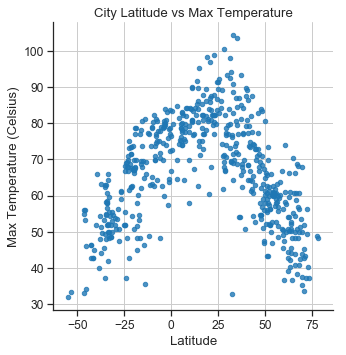

In [71]:
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")


sns.lmplot('Lat',
          'Temp',
          data=location_data,
          fit_reg=False,
          scatter_kws={"marker": "o",
                        "s": 20})
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (Celsius)")
plt.title("City Latitude vs Max Temperature")
plt.show()


#### Latitude vs. Humidity Plot

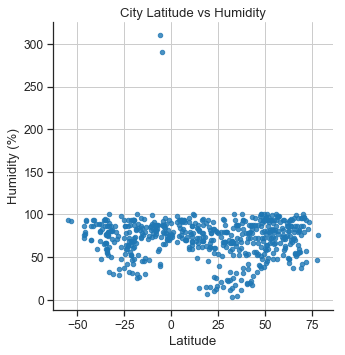

In [72]:
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")


sns.lmplot('Lat',
          'Humidity',
          data=location_data,
          fit_reg=False,
          scatter_kws={"marker": "o",
                        "s": 20})
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity")
plt.show()


#### Latitude vs. Cloudiness Plot

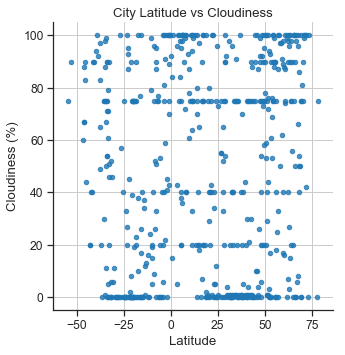

In [73]:
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")


sns.lmplot('Lat',
          'Cloudiness',
          data=location_data,
          fit_reg=False,
          scatter_kws={"marker": "o",
                        "s": 20})
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs Cloudiness")
plt.show()

#### Latitude vs. Wind Speed Plot

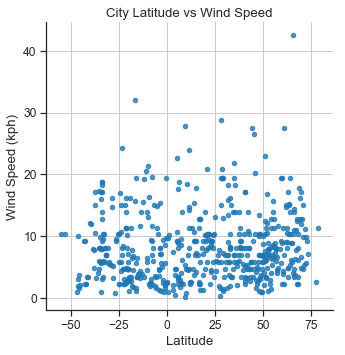

In [74]:
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")


sns.lmplot('Lat',
          'Wind Speed',
          data=location_data,
          fit_reg=False,
          scatter_kws={"marker": "o",
                        "s": 20})
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (kph)")
plt.title("City Latitude vs Wind Speed")
plt.show()